In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def entropy(x, base=np.exp(1)):
    xx = x + 1e-6*np.subtract(x==0, x==1, dtype=np.float)
    return (-x*np.log(xx)-(1-x)*np.log(1-xx)) / np.log(base)

def Fm(J, m, h=0.,beta=1.):
    return -0.5*J*m**2 - h*m - 1/beta * entropy((1+m)/2)

def find_m_star(J, h=0.,beta=1.):
    return fminbound(lambda m: Fm(J,m, h=h, beta=beta), -1, 1, disp=False)

In [2]:
fs=30  # label fontsize
fsl=20 # legend fontsize

# Exercise 1   
From the lecture, we know that the Mean Field free variational energy is given by: 
$$
F[Q]= - \frac{J}{2}  m^{2}- hm+\frac{1}{\beta}[\frac{1+m}{2}\log{(\frac{1+m}{2})}+\frac{1-m}{2}\log{(\frac{1-m}{2})}] 
$$
where $m$ is the expected total magnetisation $\mathbb{E}_{Q}{\sum_{i}s_{i}/N}$.

## 1. a)
Plot the function $ F[Q] $ as a function of $ m $ in the two following cases: 
 * (i) at $h = 0$ for different values of $ J $ larger and lower than 1 and 
 * (ii) at a value of $ J $ larger than $ 1 $ for different values (positive and negative) of $ h$.  
    
Describe what you see in both cases.

Text(0, 0.5, '$F[Q]$')

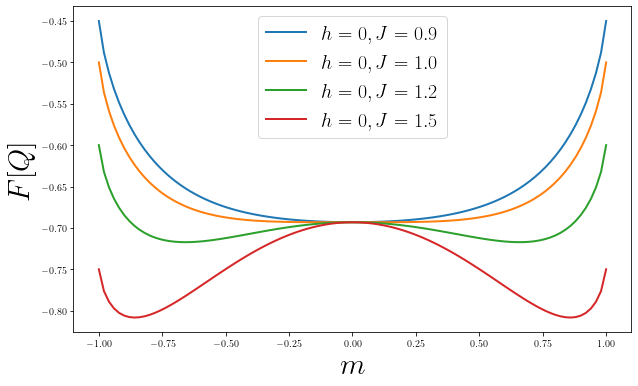

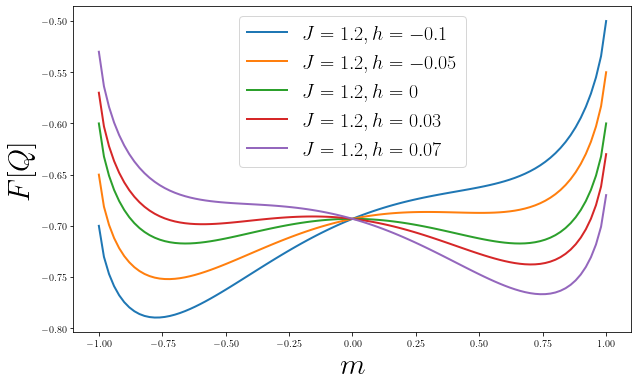

In [3]:
m = np.linspace(-1,1,101)
h, J_list = 0, [0.9,1.0,1.2,1.5]
plt.figure(figsize=(10,6))
for J in J_list:
    plt.plot(m, Fm(J, m,h=h), label=r'$h = {0}, J = {1}$'.format(h, J), linewidth=2)

plt.legend(loc='best',fontsize=fsl)
plt.xlabel(r'$m$',fontsize=fs)
plt.ylabel(r'$F[Q]$',fontsize=fs)
#plt.savefig('./figures/hw1_2(a)_1.pdf', bbox_inches='tight')

# Problem 1 (a) - (b)
m = np.linspace(-1,1,101)
J, h_list = 1.2, [-0.1, -0.05, 0, 0.03, 0.07]
plt.figure(figsize=(10,6))
for h in h_list:
    plt.plot(m, Fm(J, m,h=h), label=r'$J = {1}, h = {0}$'.format(h, J), linewidth=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='best',fontsize=fsl)
plt.xlabel(r'$m$',fontsize=fs)
plt.ylabel(r'$F[Q]$',fontsize=fs)
# plt.savefig('./figures/hw1_2(a)_2.pdf', bbox_inches='tight')

## 1.b) 
The minimizer $ m^* $ is also the solution of the self-consistent equation:
\begin{equation*}
    m = \tanh(\frac{J}{2}m+h) \, .
\end{equation*}

Compute the value of $ m^* $ in the three following cases:    
   * (i) $ h = 10^{-6} $ and $J $ between $ 0 $ and $ 2 $
   * (ii) $  h  = -10^{-6} $ and $ J$ between $ 0 $ and $ 2 $
   * (iii) $J = 1.5 $ and $ h $ between $ -1 $ and $ 1 $


Text(0, 0.5, '$m^*(J,h)$')

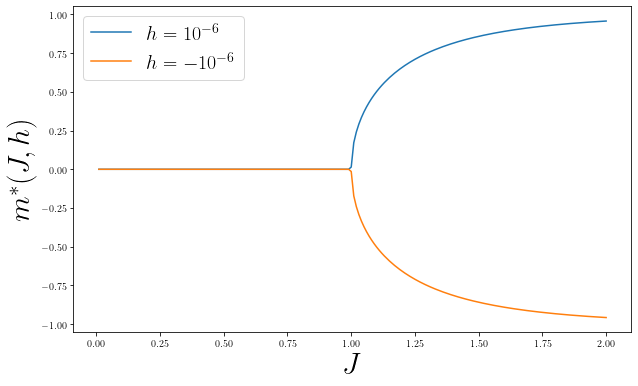

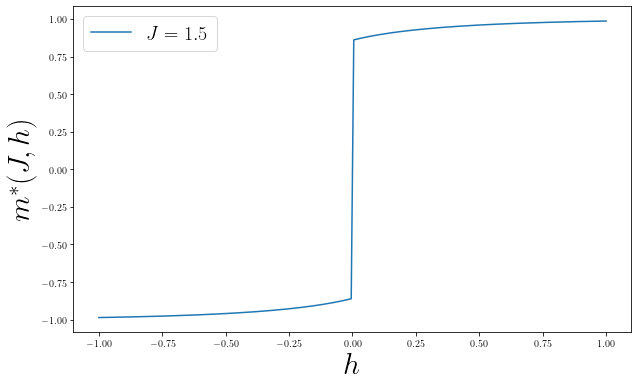

In [4]:
# h = +- 10^{-6}, J in (0, 2]
J_list = np.linspace(0.01,2,200)
m_star_pos = np.fromiter((find_m_star(J, h=1e-6) for J in J_list), float)
m_star_neg = np.fromiter((find_m_star(J, h=-1e-6) for J in J_list), float)
plt.figure(figsize=(10,6))
plt.plot(J_list, m_star_pos, label=r'$h = 10^{-6}$')
plt.plot(J_list, m_star_neg, label=r'$h = -10^{-6}$')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='best',fontsize=fsl)
plt.xlabel(r'$J$',fontsize=fs)
plt.ylabel(r'$m^*(J,h)$',fontsize=fs)
# plt.savefig('./figures/hw1_2(b)_1,2.pdf', bbox_inches='tight')

# case with fixed J=1.5, h in [-1, 1]
J, h_list = 1.5, np.linspace(-1,1,200)
m_star = np.fromiter((find_m_star(J, h) for h in h_list), float)
plt.figure(figsize=(10,6))
plt.plot(h_list, m_star, label=r'$J = {0}$'.format(J))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='best',fontsize=fsl)
plt.xlabel(r'$h$',fontsize=fs)
plt.ylabel(r'$m^*(J,h)$',fontsize=fs)
# plt.savefig('./figures/hw1_2(b)_3.pdf', bbox_inches='tight')

## 1. c)
Focusing on the case $J=1.5$. With $h=0.1,\, 0.2$, how many solutions to the self-consistency equations are there?  
Which one is the correct one? Plot the function $F[Q]$ to answer to these questions.

Text(0, 0.5, '$F[Q]$')

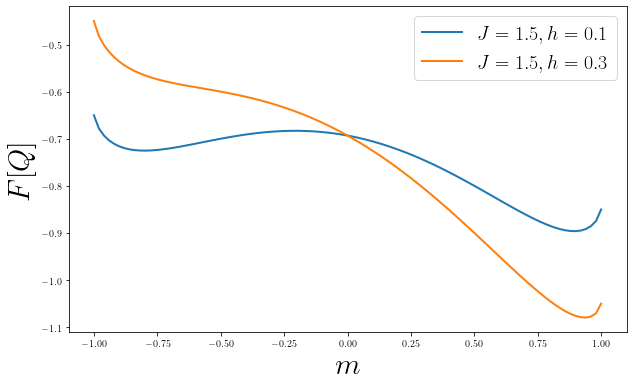

In [5]:
m, J, h1, h2 = np.linspace(-1,1,101), 1.5, 0.1, 0.3
plt.figure(figsize=(10,6))
plt.plot(m,  Fm(J, m,h=h1), label=r'$J = {1}, h = {0}$'.format(h1,J), linewidth=2)
plt.plot(m,  Fm(J, m,h=h2), label=r'$J = {1}, h = {0}$'.format(h2,J), linewidth=2)
plt.legend(loc='best',fontsize=fsl)
plt.xlabel(r'$m$',fontsize=fs)
plt.ylabel(r'$F[Q]$',fontsize=fs)
# plt.savefig('./figures/hw1_2(c).pdf', bbox_inches='tight')

# Exercise 2

Consider again the Hamiltonian of the Curie-Weiss model.   

A practical way to sample configurations of $ N $ spins from the Gibbs probability distribution:
\begin{equation*}
    P(\mathbf{s}) = \frac{ e^{-\beta H(\mathbf{s})}}{ Z} \quad,
\end{equation*}
with 
\begin{equation*}
H(\mathbf{s}) = -\frac{J}{2N} \sum_{i,j} s_i s_{j} - h \sum_i s_i \, ,   
\end{equation*}
is the Monte-Carlo-Markov-Chain (MCMC) method, and in particular the Metropolis-Hastings algorithm.   
It works as follows:  
   - Choose a starting configuration for the $ N $ spins values $ s_i = \pm 1 $ for $ i=1,\ldots,N $.
   - Choose a spin $ i $ at random. Compute the current value of the energy $ H_{\mathrm{now}} $ and the value of the energy $ H_{\mathrm{flip}} $ if the spins $ i $ is flipped (that is if $ s^{\mathrm{new}}_i = -s^{\mathrm{old}}_i $).
   - Sample a number $ r $ uniformly in $ [0,1] $ and, if $ r < e^{\beta (H_{\mathrm{now}} - H_{\mathrm{flip}})} $ perform the flip (i.e. $ s^{\mathrm{new}}_i = -s^{\mathrm{old}}_i $) otherwise leave it as it is.
   - Goto step 2.

If one is performing this program long enough, it is guarantied that the final configuration $\mathbf{s}$ will have been chosen with the correct probability.


## 2. a)
* Write a code to perform the MCMC dynamics, and start by a configuration where all spins are equal to $ 1 $.   
* Take $ h = 0 $, $J=1$, $ \beta = 1.2 $ and try your dynamics for a long enough time (say, with $ t_{\mathrm{max}} = 100 N $ attempts to flips spins) and monitor the value of the magnetization per spin $ m = \sum_i s_i/N $ as a function of time.   
* Make a plot for $ N=10,50,100,200,1000 $ spins.   
* Compare with the exact solution at $ N = \infty $.   

Comment.

In [6]:
def CW_simul(N, beta, h, t_max=None, S0=None):
    t_max, S = t_max or 100 * N, S0 or np.ones(N)
    delta_E = lambda S, k, h: -2 * S[k] * ((S.sum()-S[k])/N + h )
    
    m = np.full(t_max, np.nan)
    for t in range(t_max):
        k, r = np.random.randint(0, N), np.random.uniform(0, 1)
        if r < np.exp(beta * delta_E(S, k, h)):
            S[k], m[t] = -S[k], S.mean()
    return m

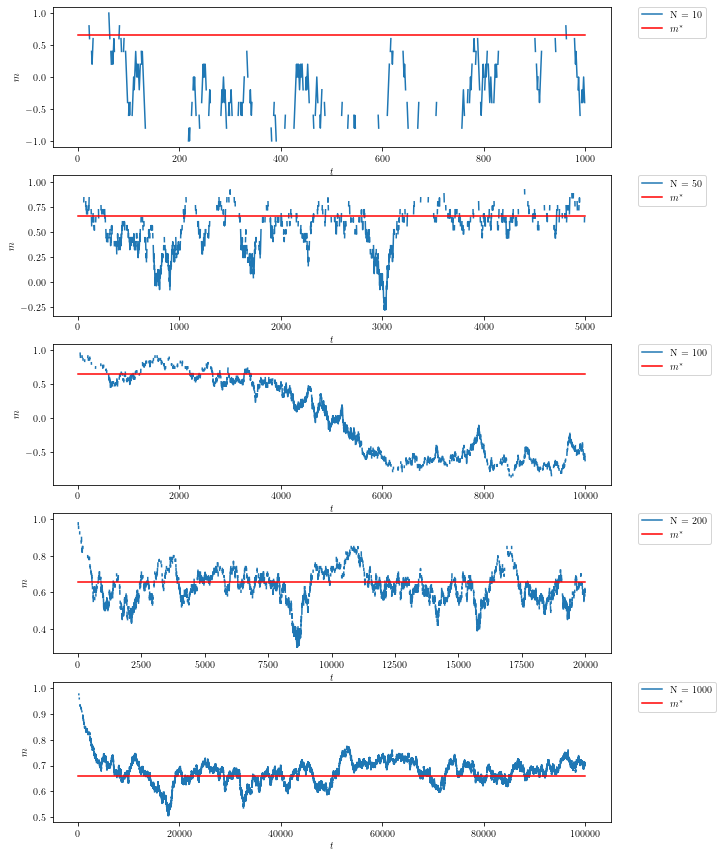

In [7]:
J, beta, h, N_list = 1., 1.2, 0, [10, 50, 100, 200, 1000]
plt.figure(figsize=(10,3*len(N_list)))
for i, N in enumerate(N_list, 1):
    m = CW_simul(N, beta, h)
    plt.subplot(len(N_list),1,i)
    plt.plot(m, label=r'N = {0}'.format(N))
    plt.plot([0, m.size], find_m_star(J, h, beta) * np.array([1,1]), label=r'$m^*$', linestyle='-', color='red')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$m$')
# plt.savefig('./figures/hw1_3(a).pdf', bbox_inches='tight')

## 2. b)
* Start by a configuration where all spins are equal to $ 1 $ and take $ h = -0.1 $, $J=1$, $ \beta = 1.2 $.  
Monitor again the value of the magnetization per spin $ m = \sum_i s_i/N $ as a function of time. 
* Make a plot for $ N = 10,50,100,200,1000 $ spins.
* Compare with the exact solution at $ N = \infty $. 

Comment.

AttributeError: 'Line2D' object has no property 'style'

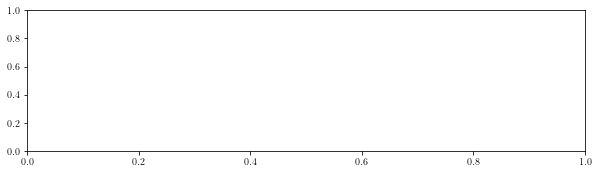

In [10]:
beta, h, N_list = 1.2, -0.1, [10, 50, 100, 200, 1000]
plt.figure(figsize=(10,3*len(N_list)))
for i, N in enumerate(N_list, 1):
    m = CW_simul(N, beta, h)
    plt.subplot(len(N_list),1,i)
    plt.plot(m, label=r'N = {0}'.format(N), style=".")
    plt.plot([0, m.size], find_m_star(beta, h) * np.array([1,1]), label=r'$m^*$', linestyle=':', color='red')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$m$')
# plt.savefig('./figures/hw1_3(b).pdf', bbox_inches='tight')